<a href="https://colab.research.google.com/github/DavidShaginyan/Nis_project/blob/main/%D0%9D%D0%98%D0%A1_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%91%D0%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выходные данные были обрезаны до нескольких последних строк (5000).
#БольшойТеатр
#БольшойМоимиГлазами
#BolshoiInMyEyes
----------------------------------------
Post ID: 37
Date: 1718290802
Text: Большой театр в Москве – это один из самых знаменитых и значимых театров мира, история которого начинается с 1776 года. Основанный Екатериной II, он изначально представлял собой частную антрепризу, но со временем превратился в один из символов русской культуры. 
Театр известен своими оперными и балетными постановками, которые привлекают внимание зрителей со всего мира. Здесь выступали и продолжают выступать выдающиеся артисты, среди которых немало мировых звезд.
 
Здание театра, расположенное на Театральной площади, является архитектурным памятником. Оно неоднократно перестраивалось и реставрировалось, но сохранило свой уникальный облик. Фасад здания украшен колоннами и скульптурами, а внутри находятся роскошные залы и фойе.
 
В 2005-2011 годах театр был закрыт на масштабную реконструкцию, кот

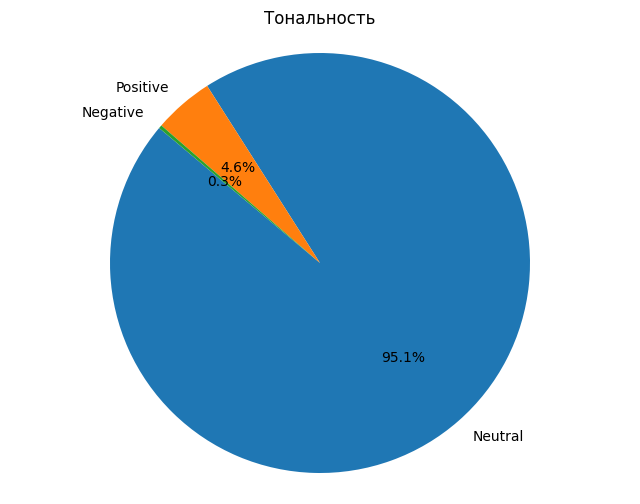

Выходные данные были обрезаны до нескольких последних строк (5000).
#БольшойТеатр
#БольшойМоимиГлазами
#BolshoiInMyEyes
----------------------------------------
Post ID: 37
Date: 1718290802
Text: Большой театр в Москве – это один из самых знаменитых и значимых театров мира, история которого начинается с 1776 года. Основанный Екатериной II, он изначально представлял собой частную антрепризу, но со временем превратился в один из символов русской культуры. 
Театр известен своими оперными и балетными постановками, которые привлекают внимание зрителей со всего мира. Здесь выступали и продолжают выступать выдающиеся артисты, среди которых немало мировых звезд.
 
Здание театра, расположенное на Театральной площади, является архитектурным памятником. Оно неоднократно перестраивалось и реставрировалось, но сохранило свой уникальный облик. Фасад здания украшен колоннами и скульптурами, а внутри находятся роскошные залы и фойе.
 
В 2005-2011 годах театр был закрыт на масштабную реконструкцию, кот

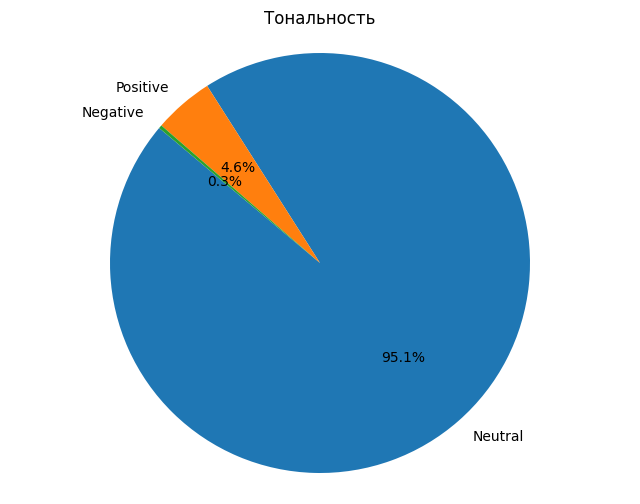

In [ ]:
import requests # Для запросов
import csv # Для чтения csv файлов
import time
from textblob import TextBlob # Для измерения тональности текста
import pandas as pd # для работы с данными
import matplotlib.pyplot as plt # Для работ с визуализацией данных

#Функция парсит посты Она главная здесь
def get_vk_posts_by_hashtags(token, hashtags, count):
    url = 'https://api.vk.com/method/newsfeed.search' # URl к котрому обращаемся и получаем даннные
    all_posts = [] #Массив для хранения постов

    for hashtag in hashtags: # Проходимся по каждому хэштегу из массива hashtegs
        params = {
            'q': f'#{hashtag}',
            'count': count,
            'access_token': token,
            'v': '5.131'
        }

        response = requests.get(url, params=params) # Отправляем get запрос на нашк страницу

        if response.status_code == 200:
            data = response.json()
            if 'response' in data:
                all_posts.extend(data['response']['items'])
            else:
                print(f"Error for hashtag #{hashtag}: {data['error']['error_msg']}")
        else:
            print(f"HTTP Error for hashtag #{hashtag}: {response.status_code}")

    return all_posts

# Функция анализирует тональность
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    # Проверяем полярность текста (-1 до 1)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


csv_file = './vk_posts.csv'
token = "vk1.a.8nS5-dDiah1PLFUsN46kcZIQQuxzrSN9upqxQ8GTfAbiwhMoEDZEeas1HNu-pNnx2xBhunCGJuW40B2KYx3rFgenYxlTRsfVr2yjzCY--Akp6nLrml8xgFylxf4K7AVvLccNDWuHkuc_lWUBNlC6WiynXoXFwKWT_qJldavQCHgKfOWZdywfgW1-rXar3dnF"
count = 200
hashtags = ['БольшойТеатр', 'Большойтеатр', 'Bolshoitheatre', 'BolshoiTheatre']

posts = get_vk_posts_by_hashtags(token, hashtags, count)

# Этап 2 Создание CSV файла и запись заголовков
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['ID поста', 'Дата', 'Текст'])

    if posts:
        for post in posts:
            post_id = post['id']
            post_date = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(post['date']))
            post_text = post['text'].replace('\n', ' ').replace('\r', ' ')  # Убираем переносы строк из текста

            writer.writerow([post_id, post_date, post_text])
            print(f"Post ID: {post['id']}")
            print(f"Date: {post['date']}")
            print(f"Text: {post['text']}")
            print('-' * 40)

# Этап 3 Анализ тональности
df = pd.read_csv(csv_file)
df['Тональность'] = df['Текст'].apply(analyze_sentiment)
df.to_csv('vk_posts_anal.csv', index=False)

tone_counts = df['Тональность'].value_counts()

# Этап 4 Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(tone_counts, labels=tone_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Тональность')
plt.axis('equal')  # Задаем равные пропорции осей, чтобы диаграмма выглядела как круг
plt.show()
#https://oauth.vk.com/authorize?client_id={APP_ID}&display=page&redirect_uri={REDIRECT_URI}&scope=wall&response_type=token&v=5.131
# https://oauth.vk.com/blank.html#access_token=vk1.a.KeIRm87wjGirIjt26M0UaME5DNC0e5dXY4fuwwx6pEHGbFnt4GYi2AXR335bw5PWm1qcT89e-UpO9we1DGv3FheP7nuddEdXdP6s5OHDbZ1-zg_oNWs0l4jRSd6dbt_SfcGUV_wg0NuWKtfXyp9adeQtPcTAZ94iaOCFRGnGU8F5yvuCvT0965ztiPA3xBIzf5YXoqWFvnNF_SPBM6nc4w&expires_in=86400&user_id=463639280